Submitted by: Parth Varangaonkar (201851829)



# Introduction

The dataset presesnted to was from the Airbnb website. This data had multiple opportunities to be explored. The problem addressed here in this report is the use of different regression techniques to predict the price. There are two techniques that have been used here, namely Linear regression and Voting classifier under the Random Forest Classifer.

Linear regression is a supervised method which uses a dependent variable and one (or more) independent variables to estabilish a linear relationship. This can be used to predict a given value as well.

The dataset has 2375 rows and 28 columns which have various attributes such as price, location, name of the host, host id, wtc which are used in the prediction of the price. This dataset explains the hosting of various types of properties that can be rented as per the customer's requirement. It shows the spread of properties in the city of Bristol. The customer may leave a review which can be helpful for the analysis. Availabilty of rented property is for a tourist who is just around the city as well as for a resident who is willing to stay for a longer period of time over the year. There are various aspects to this data that can be utilised in solving different problems. However, the prediction of the price seemed to have a better model for regression which could give a more accurate version of the predicted value from linear regression.

# Data Preprocessing

The dataset had a lot of different errors in it. It needed a thorough cleaning to perform any analysis to avoid any erroneous values from the regression. The error values in the dataset were:-
        
        1. A lot of null values in different columns
        2. Faulty pincodes(England, City of Bristol, etc) in the 'pincode' column
        3. Dates added into the review columns at different places
        4. "Accomodates" column had property types in them
        5. Property types had unknown values such as 'f' and 't'

The null values had to be dropped due to the fact that there was not one way to deal with range of different columns. After dropping the columns there were only 1945 columns left in the dataset. After dealing with the null values, the postcodes had to be fixed. While exploring the dataset for errors, it was noticed that the errors in the postcode were in the same columns which had the other errors. First of all the number of faulty pincodes was counted so as to check if the number is too high to be eliminated. If the number had been too big, dropping these values would not have been an option. But the number was low, hence using "regex" the postcodes were eliminated and the other errors were fixed along with it. 
 

# Choice of features and Model
 
The features that were selected for the regression model were:
'beds', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'

These were decided on the basis of the correlation map. There were a few variables that could be fitted for the model to be better. Hence, after looking through the correlation matrix and heatmap it was easier to decide onto the model.

# Application, Evaluation and Validation

The application of the linear regression model is predict the price. For this purpose, a model was based on the afore mentioned variables (Under the choice of features and model). To get a prediction value from the model it is necessary to remove any outliers from the independent variable. The removal of outliers is important in order to avoid any predicted value that could possibly wave off the near accurate one. If there are any outliers in the model, then the predicted value will be far off than the actual predicted value. 

The Voting classifier uses the same model to predict a class out of the various techniques. After that it uses the results of all these techniques to check the majority of the classes that have been made with the techniques. Here, the techniques used are LogisticRegression, Random forest classifier and Support vector classifiers to decide upon the majoirty using hard voting.

To validate the accuracy of the models, the use of RMSE value was implemented.

# Interpretation of results

The predicted value of the Regression model was 38.60753650702343 and the variance for the same is 0.53. It is supposed that the price value will increase to 38. The variance suggests that there is a probabilty of 53% that this might not be the exact value that the 'price' will reach as predicted value.

The different classifiers from Voting classsifier suggest the fact that the price class will majorly lie near about 43 pounds. The results show that the maximum value will be around 64 while the lowest will be around 43. In a plot for price vs minimum nights, it can be seen that there are a majority of prices values which lie near the lowest value of the Support Vector Classifier. The code used for the classification is from the book 'Hands on machine learning with Scikit-learn and Tensorflow' by Aurelien Geron. 

To conclude this report it can be said that the predicted value is near about accurate.
 

In [11]:
#import the required libraries in the project 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Read the dataset and declare it as 'airbnb'

airbnb = pd.read_csv("D:/sem 2/cs986/assignment/Airbnb.csv")

In [13]:
#exploring the dataset to further understand it and decide upon a question! 

type(airbnb)
airbnb.shape
airbnb.info()
airbnb.columns
airbnb.describe
airbnb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 28 columns):
id                                2375 non-null int64
name                              2375 non-null object
host_id                           2375 non-null int64
host_name                         2375 non-null object
neighbourhood                     2375 non-null object
postcode                          2326 non-null object
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null object
room_type                         2375 non-null object
accommodates                      2375 non-null object
bathrooms                         2372 non-null object
bedrooms                          2372 non-null object
beds                              2372 non-null object
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_revie

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,...,2.10,96,10,9,10,10.0,10.0,10.0,5,44
1,117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,...,1.40,99,10,10,10,10.0,10.0,10.0,1,360
2,146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,...,0.76,91,9,8,9,10.0,9.0,9.0,2,46
3,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,NaN,51.441006,-2.601208,Townhouse,Private room,...,0.41,95,9,9,10,10.0,9.0,9.0,2,57
4,220956,"Light, Modern, 1st Floor Apartment.",1145941,Stephen,Bedminster,England,51.438517,-2.601421,Apartment,Entire home/apt,...,0.85,94,10,9,10,10.0,9.0,9.0,1,253


In [14]:
#to check if there are any null values in the dataset
airbnb.isnull().any()

#now that we know there are null values lets find out the count for it
airbnb.isnull().sum()


id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
postcode                           49
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           3
bedrooms                            3
beds                                3
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       306
reviews_per_month                 306
review_scores_rating              336
review_scores_accuracy            338
review_scores_cleanliness         338
review_scores_checkin             340
review_scores_communication       338
review_scores_location            340
review_scores_value               340
calculated_h

In [18]:
#to further explore the dataset to gain a better insight of the data 
airbnb.columns
airbnb.host_name.value_counts()
airbnb.property_type.value_counts()
airbnb.price.value_counts()
airbnb.property_type.value_counts()

# to check the duplicated data and here we find that there is no redundancy in the dataset

dup=airbnb.duplicated()
sum(dup)

# Data cleaning 
#dropping null values to cleanse the data by asigning it into a variable 'airdrop'
airdrop = airbnb.dropna(how = 'any', axis='rows')

#again check the null values to verify if they have been fixed
airdrop.isnull().sum()

#saving the above as a csv file to avoid any issues 
airdrop.to_csv('D:/sem 2/cs986/assignment/airdrop.csv')

# using this newly saved file to analyse and perform various techniques

airdrop.describe() #explore it further to understand

#to use any machine learning algorithms, eliminating any adversities is important
# Postcode column has a few errors where there are city/country names
# hence we first check the count for it
sum(airdrop.postcode.str.contains('England'))
sum(airdrop.postcode.str.contains('Somerset'))
sum(airdrop.postcode.str.contains('City of Bristol'))

#to drop the postcodes with erroneous values in the resctive columns using regex
filter = airdrop['postcode'].str.contains('^[B|b][S|s][0-9|A-Z|a-z|\S]+')
airdrop2 = airdrop[filter]

Text(0.5, 1.0, 'Number of property types in Bristol')

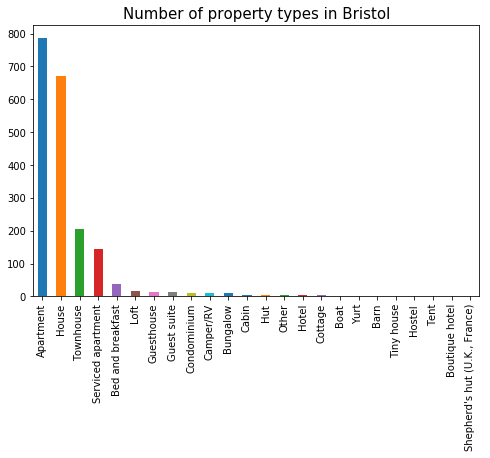

In [41]:
# Visualisation of the data to summarize it in a better and more efficient way

# The Highest number of properties in the dataset 
airdrop2['property_type'].value_counts().plot.bar(figsize=(8,5))

plt.title('Number of property types in Bristol', fontsize = 15)

# Visualisation of dataset

As it can be clearly seen in the above figure, it is evident that the highest number of property type that is available for renting in Bristol is apartments. The number is significantly large when it is compared to other types of properties which show a trifle value. The second highest number is occupied by the houses which are also in a high number. The houses and the apartments have a majority of share of the properties since it can be clearly seen that the other properties have a low number on the graph and some are not even visible on the graph.

Text(0.5, 1.0, 'Location ratings for bnb')

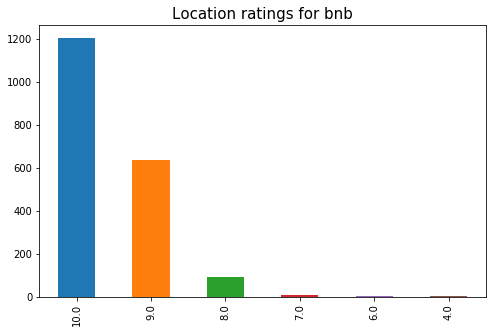

In [40]:
# Location scores and the highest number of ratings
airdrop2['review_scores_location'].value_counts().plot.bar(figsize=(8,5))
plt.title('Location ratings for bnb', fontsize = 15)

The above graph represents the highest number of ratings that have been received by the particular locations on the map of City of Bristol. The large number of positive ratings reveal that the different regions have a good administration and the customers are overall satisfied with the sites under Airbnb.

Text(0.5, 1.0, 'Review scores for Airbnb')

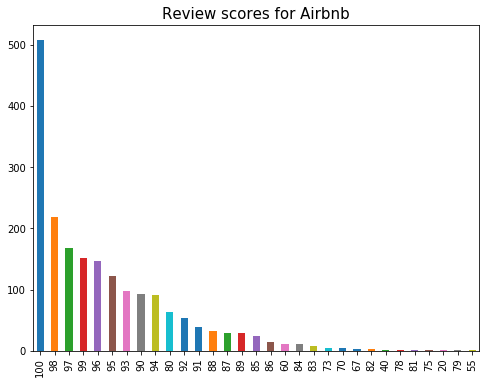

In [48]:
# Review scores and their ratings  
airdrop2['review_scores_rating'].value_counts().plot.bar(figsize=(8,6))
plt.title('Review scores for Airbnb', fontsize = 15)

Above figure is a display of the review scores that Airbnb have received. On a scale of 0-100, the results are overwhelimgly positive for this graph because of the abundance of a full score of 100 on 100. Almost a half of the reviews have a full score which is a good indication for the company and its hosts.

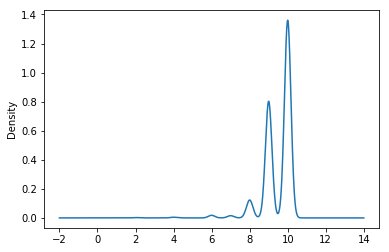

In [22]:
# Review scores and their density across the dataset
airdrop2['review_scores_value'].plot.density()
plt.show()

The plot density shows that there is huge number of perfect reviews for this section. However, there are no negative review scores here because of the absence of any reviews below 4. Even though 4 can be considered as a negative review, it can rather be considered as an opportunity to improve upon these scores.

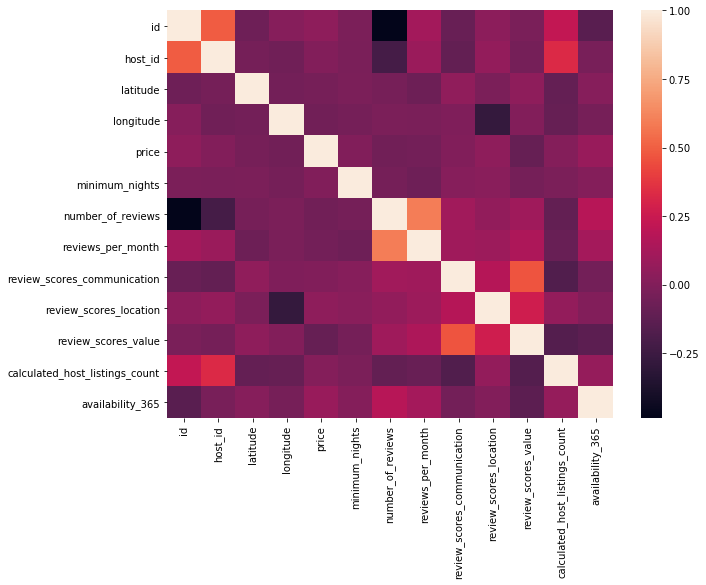

In [44]:
# Correlation displayed using a heatmap
plt.figure(figsize=(10,7.5)) 
corr = airdrop.corr() 
sns.heatmap(corr) 

Text(0.5, 1.0, 'Population of properties')

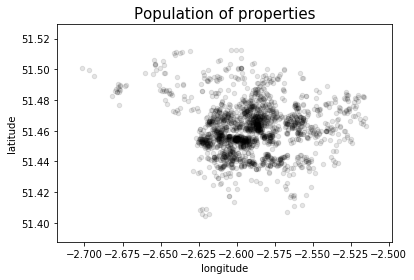

In [45]:
#How the sites are spread across the longitudes and latitudes 

airdrop2.plot(kind='scatter', x='longitude', y='latitude', color='black', alpha= 0.1)
plt.title('Population of properties', fontsize = 15)

The scatter plot shows the how the properties are spread across the city of Bristol. It is evident that there are more number of properties that are in the central part of the city while there are only a few that are on the outskirts. The darker region shows a higher number of properties hosted by Airbnb. 

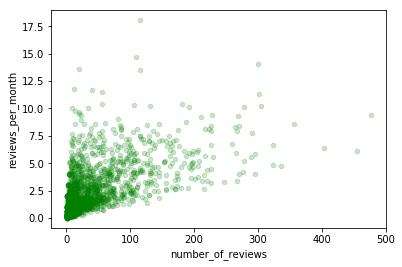

In [26]:
#to understand the correlation between number of reviews and the reviews per month as 
# it shows a higher correlation between these two features on the Heatmap

airdrop2.plot(kind='scatter', x = 'number_of_reviews', y = 'reviews_per_month', color='green', alpha = 0.2)

The relationship between the reviews per month and the number of reviews is a bit complex. It is seen that the number of reviews is high when there are few number of reviews. This means that there are is a increase in the reviews per month but with only a few that are registered. The concentration of the reviews is near the origin which suggests that these variables are not linear and do not have a specific relationship between them.

Text(0.5, 1.0, 'Relationship between minimum nights and price')

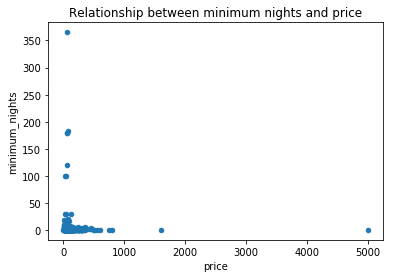

In [27]:
# Relationship between minimum night's stay and the price of a location
airdrop2.plot(kind = 'scatter', x= 'price', y = 'minimum_nights')
plt.title('Relationship between minimum nights and price')

There is a significant relationship between the minimum number of nights and the price. The outlier here is the one near to the x-axis. This suggests that there are different property types available at different prices which depends on the minimum stay at the place. Most of the price range is low with a lower number of stay nights.

Text(0.5, 1.0, 'Number of properties  in each Neighbourhood')

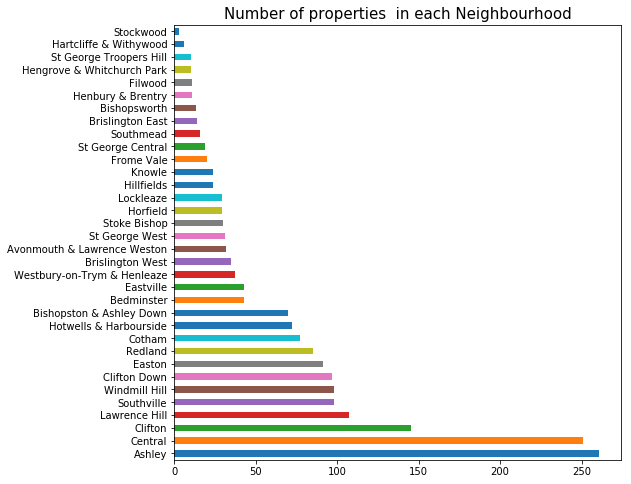

In [46]:
#which neighbourhood is populated
airdrop2['neighbourhood'].value_counts().plot.barh(figsize=(8,8))
plt.title('Number of properties  in each Neighbourhood', fontsize = 15)

There is a large number of properties in the regions of Ashley and Central Bristol. These two have the top two spots when it comes to the density of properties. The next region that is the most populated is Clifton. With the third spot in the graph, Clifton still has a large gap in the number of properties as compared to Central and Ashley. If the Graph is studied then it can be implied that the regions with low number properties are supposedly on the outskirts of Bristol as mentioned a before mentioned graph which suggested the same (i.e, The lesser number of properties are scattered on the outer region of the city).

Dataset has 1942 rows, 28 columns.


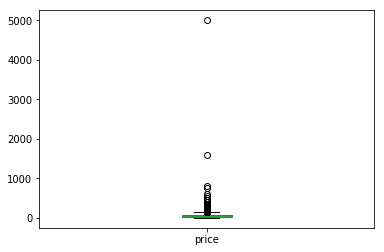

In [29]:
#performing regression on the 'price'
#linear Regression

#for checking the outliers in the price column
airdrop2.price.plot(kind='box', subplots = True)

# Since there are a few outliers, we can take them out
#outlier drop

airdrop2 = airdrop2.query('7<=price<=1000')
print("Dataset has {} rows, {} columns.".format(*airdrop2.shape))




In [35]:
# Make a new set so as to not affect the original dataset
# this will have the numeric values which will be used to predict the price
priceless = airdrop2[['beds', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']]

#linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = priceless
y = airdrop2['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

rmsels = sqrt(mean_squared_error(y_test,y_test_pred))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print(rmsels)
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))


MSE train: 1860.155, test: 1490.542
R^2 train: 0.491, test: 0.534
38.60753650702343
Variance score: 0.53


In [36]:
# to include catergorical data such as 'property_type' it needs to be transformed.
# One Hot Encoding is used to make this possible
#transforming and one-hot encoding

#Isolate categorical attribute
prop_type = airdrop2['property_type']
prop_type.head(10)

#factorise and turn into integers 
prop_type_encode, prop_type_cat = prop_type.factorize()

prop_type_encode
len(prop_type_encode)
prop_type_cat


#One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#to reshape into 2-d array
prop_type_cat_1hot = encoder.fit_transform(prop_type_encode.reshape(-1,1))
prop_type_cat_1hot

#one-hot encoding performed

# Sparse matrix to convert into dense array
prop_type2 = prop_type_cat_1hot.toarray()


#join data
enc_data = pd.DataFrame(prop_type_cat_1hot.toarray())
enc_data.columns = prop_type_cat
enc_data.index = airdrop2.index

priceless=priceless.join(enc_data)


C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [37]:
# check the values in the dataset
airdrop2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
count,1.942000e+03,1.942000e+03,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,1.858551e+07,6.686258e+07,51.460995,-2.590583,69.344490,2.540680,37.353759,2.251133,9.837796,9.557673,9.477858,6.580844,124.554583
std,7.421370e+06,6.043066e+07,0.016076,0.025510,59.729592,11.748925,54.362977,2.222543,0.538045,0.637583,0.779221,16.010442,127.759518
min,7.082000e+04,5.253600e+04,51.404299,-2.701418,7.000000,1.000000,1.000000,0.020000,2.000000,4.000000,2.000000,1.000000,0.000000
25%,1.378330e+07,1.867737e+07,51.452321,-2.607065,35.000000,1.000000,5.000000,0.590000,10.000000,9.000000,9.000000,1.000000,2.000000
50%,1.985821e+07,4.633452e+07,51.460701,-2.592073,55.000000,2.000000,16.000000,1.520000,10.000000,10.000000,10.000000,1.000000,75.000000
75%,2.441058e+07,1.048043e+08,51.469854,-2.578006,80.750000,2.000000,46.000000,3.205000,10.000000,10.000000,10.000000,3.000000,239.750000
max,2.997758e+07,2.239963e+08,51.512555,-2.514635,799.000000,365.000000,477.000000,18.030000,10.000000,10.000000,10.000000,78.000000,365.000000


In [38]:

#voting classifier on the y_pred applied on the afore mentioned model  

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf  = LogisticRegression()
svm_clf = SVC()
rnd_clf = RandomForestClassifier()

voting_clf = VotingClassifier (
        estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
        voting = 'hard'
        )

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vpart\

LogisticRegression 0.061696658097686374
RandomForestClassifier 0.06426735218508997


C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.043701799485861184


C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vpart\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.043701799485861184
